# 0.0 PLANEJAMENTO DA SOLUÇÃO

### 0.1 INPUT

 - PROBLEMA DE NEGOCIO
    -   SELECIONAR OS CLIENTES MAIS VALIOSOS PARA UM PROGRAMA DE FIDELIDADE
 - CONJUNTO DE DADOS
   -  VENDA DE UM ECOMMERCE ONLINE, DURANTE O PERIODO DE UM ANO

### 0.2 OUTPUT

- A INDICAÇÃO DAS PESSOAS QUE FARÃO PARTE DO PROGRAMA DE FIDELIDADE
    - LISTA: client_id | is_insider
- RELATORIO COM AS RESPOSTAS DAS PERGUNTAS DE NEGOCIO
    - QUAIS SAO AS PESSOAS ELEGIVEIS PARA PARTICIPAR DO PROGRAMA DE FIDELIDADE
    - QUANTOS CLIENTES FARÃO PARTE DO GRUPO
    - QUAIS AS PRINCIPAIS CARACTERISTICAS DESSES CLIENTES
    - QUAL A PORCENTAGEM DE CONTRIBUIÇÃO VINDO DESSES INSIDERS
    - QUAL A EXPECTATIVA DE FATURAMENTO PARA ESSE GRUPO NOS PROXIMOS MESES
    - QUAIS AS CONDIÇÕES PARA UMA PESSOA SER ELEGIVEL PARA O INSIDERS
    - QUAIS AS CONDIÇÕES PARA UMA PESSOA SER REMOVIDA DO INSIDERS
    - QUAL A GARANTIA QUE O PROGRAMA DE FIDELIDADE É MELHOR QUE O RESTANTE DA BASE
    - QUAIS AS AÇÕES O TIME DE MARKETING PODE REALIZAR PARA AUMENTAR O FATURAMENTO

### 0.3 TASKS

- QUAIS SAO AS PESSOAS ELEGIVEIS PARA PARTICIPAR DO PROGRAMA DE FIDELIDADE
    -   O QUE É SER ELEGIVEL? O QUE SÃO OS CLIENTES DE MAIOR VALOR?
    -   FATURAMENTO
        -   ALTO TICKET MEDIO
        -   ALTO LIFE TIME VALUE
        -   BAIXA RECÊNCIA
        -   ALTO BASKET SIZE
        -   BAIXA PROBABILIDADE DE CHURN
        -   ALTA PREVISÃO DE LTV
        -   ALTA PROPENSÃO DE COMPRA

    -   CUSTO
        -   BAIXA TAXA DE DEVOLUÇÃO

    -   EXPERIENCIA DE COMPRA
        -   MEDIA ALTA DAS AVALIAÇÕES

- QUANTOS CLIENTES FARÃO PARTE DO GRUPO
    -   NUMERO TOTAL DE CLIENTES
    -   % DO NUMERO DE INSIDERS

- QUAIS AS PRINCIPAIS CARACTERISTICAS DESSES CLIENTES
    -   ESCREVER CARACTERISTICAS DO CLIENTE
        -   IDADE
        -   LOCALIZAÇÃO

    - CARACTERISTICAS DO CONSUMO
        - FEATURES DA CLUSTERING

- QUAL A PORCENTAGEM DE CONTRIBUIÇÃO VINDO DESSES INSIDERS
    - FATURAMENTO TOTAL E COMPARA COM O FATURAMENTO DO GRUPO

- QUAL A EXPECTATIVA DE FATURAMENTO PARA ESSE GRUPO NOS PROXIMOS MESES
    - LTV DO INSIDERS
    - ANALISE DE COHORT

- QUAIS AS CONDIÇÕES PARA UMA PESSOA SER ELEGIVEL PARA O INSIDERS
    - DEFINIR PERIODICIDADE (MES, 3 MESES...)
    - A PESSOA PRECISA SER PARECIDA COM OUTRA PESSOA DO GRUPO INSIDERS

- QUAIS AS CONDIÇÕES PARA UMA PESSOA SER REMOVIDA DO INSIDERS
    - DEFINIR PERIODICIDADE
    - A PESSOA PRECISA SER DISIMILAR DO RESTANTE DO GRUPO INSIDERS

- QUAL A GARANTIA QUE O PROGRAMA DE FIDELIDADE É MELHOR QUE O RESTANTE DA BASE
    - TESTE A/B
    - TESTE A/B BAYESIANO
    - TESTE DE HIPÓTESES

- QUAIS AS AÇÕES O TIME DE MARKETING PODE REALIZAR PARA AUMENTAR O FATURAMENTO
    - DESCONTO
    - PREFERENCIA DE COMPRA
    - FRETE
    - VISITA A EMPRESA

### 0.4 BENCHMARK - PESQUISA

- DESK RESEARCH

MODELO RFM
-   RECÊNCIA: TEMPO DESDE A ULTIMA COMPRA
    - ORDENA PELA RECÊNCIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA
-   FREQUÊNCIA: QUANTIDADE DE COMPRA FEITAS NA EMPRESA
    - ORDENA PELA FREQUÊNCIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA
-   MONETÁRIA: TOTAL GASTO, "HIGH-VALUE PURCHASE"
    - ORDENA PELA MONETÁRIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA

- FAZ A MÉDIA DAS 3 NOTAS E ORDENA PELA MAIOR NOTA

- SEGMENTAÇÃO: PELA 2 DAS NOTAS, E BOTA A TERCEIRA NOTA COMO COR NO GRÁFICO

# 1.0 IMPORT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display        import HTML
from sklearn import cluster as c
from sklearn import metrics as m
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from plotly import express as px
import umap.umap_ as umap

c:\Users\jocaf\anaconda3\envs\cluster\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1.1 HELPER FUNCTIONS

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [18, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings();

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1.2 LOAD DATA

In [3]:
df = pd.read_csv( "..\data\Ecommerce.csv", encoding = "ISO-8859-1" )
df1 = df.drop( columns=['Unnamed: 8'], axis=1 )

In [4]:
df1.shape

(541909, 8)

In [5]:
df1.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
406313,571746,21889,WOODEN BOX OF DOMINOES,12,17-Oct-17,1.25,17043.0,United Kingdom
317425,564760,85116,BLACK CANDELABRA T-LIGHT HOLDER,10,28-Aug-17,1.63,NaN,United Kingdom
299842,563174,23291,DOLLY GIRL CHILDRENS CUP,8,10-Aug-17,1.25,16746.0,United Kingdom
476882,577038,21232,STRAWBERRY CERAMIC TRINKET POT,16,15-Nov-17,1.25,14796.0,United Kingdom
86505,543549,21985,PACK OF 12 HEARTS DESIGN TISSUES,1296,8-Feb-17,0.22,17940.0,United Kingdom


# 2.0 DESCRIÇÃO DOS DADOS

In [6]:
df2 = df1.copy()

## 2.1 Rename Columns

In [7]:
cols = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df2.columns = cols
df2.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 2.2 Data dimensions

In [8]:
print(f'Number of rows: {df2.shape[0]}')
print(f'Number of columns: {df2.shape[1]}')

Number of rows: 541909
Number of columns: 8


## 2.3 Data types

In [9]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 2.4 Check NA

In [10]:
df2.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 2.5 Replace NA

In [11]:
# remove na
df2 = df2.dropna(subset=['description', 'customer_id'])
print('Removed data: {:.2f}'.format( 1 - (df2.shape[0] / df1.shape[0] ) ) )

Removed data: 0.25


In [12]:
df2.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 2.6 Change Dtypes

In [13]:
# invoice date
df2['invoice_date'] = pd.to_datetime( df2['invoice_date'], format='%d-%b-%y' )

# customer id
df2['customer_id'] = df2['customer_id'].astype(int)

In [14]:
df2.sample(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
464490,576098,22961,JAM MAKING SET PRINTED,12,2017-11-12,1.45,14862,United Kingdom


In [15]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## 2.7 Descriptive Statistics

In [16]:
num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 2.7.1 Numerical Attributes

In [17]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - standard deviation, min, max, range skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# cancat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988


1. quantidade negativa
2. preço unitario igual a zero

### 2.7.2 Categorical Attributes

In [18]:
cat_attributes.head()

,invoice_no,stock_code,description,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850,United Kingdom


In [19]:
# invoice number
len( cat_attributes.loc[cat_attributes['invoice_no'].apply( lambda x: bool(re.search( '[^0-9]+', x ) ) ), 'invoice_no'].drop_duplicates() )

3654

In [20]:
# stock code
# h = len( cat_attributes.loc[cat_attributes['stock_code'].apply( lambda x: bool(re.search( '[^0-9]+', x ) ) ), 'stock_code'].head() )

cat_attributes.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

array(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

# 3.0 DATA FILTERING

In [21]:
df3 = df2.copy()

In [22]:
# unit price > 0
df3 = df3.loc[df3['unit_price'] > 0.01, :]

# stock code != [POST, D, M, DOT, CRUK, C2]
df3 = df3[~df3['stock_code'].isin( ['POST', 'D', 'M', 'DOT', 'CRUK', 'C2'] )]

In [23]:
# negative quantity - products that has been returned
df_return = df3.loc[df3['quantity'] < 0, :]
df_purchase = df3.loc[df3['quantity'] > 0, :]

In [24]:
df_purchase.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


# 4.0 FEATURE ENGINEERING

In [25]:
df4 = df3.copy()

## 4.1 Feature Creation

In [26]:
# data reference
df_ref = df4.drop( ['invoice_no', 'stock_code', 'description',
                    'quantity', 'invoice_date', 'unit_price',
                    'country'], axis=1 ).drop_duplicates( ignore_index=True )

In [27]:
pd.options.mode.chained_assignment = None

In [28]:
# Gross Revenue (Faturamento) quantity * price = faturamento
df_purchase['gross_revenue'] = df_purchase['quantity'] * df_purchase['unit_price']

# Monetary
df_monetary = df_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

# Recency
df_recency = df_purchase[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df_purchase['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )


# Frequency
df_frequency = df_purchase[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge( df_ref, df_frequency, on='customer_id', how='left' )

# AVG Ticket
df_avg_ticket = df_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
avg_ticket       27
dtype: int64

In [29]:
# # Gross Revenue (Faturamento) quantity * price = faturamento
# df4['gross_revenue'] = df4['quantity'] * df4['unit_price']

# # Monetary
# df_monetary = df4[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
# df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

# # Recency
# df_recency = df4[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
# df_recency['recency_days'] = (df4['invoice_date'].max() - df_recency['invoice_date']).dt.days
# df_recency = df_recency[['customer_id', 'recency_days']].copy()
# df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

# # Frequency
# df_frequency = df4[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
# df_ref = pd.merge( df_ref, df_frequency, on='customer_id', how='left' )

# # AVG Ticket
# df_avg_ticket = df4[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
# df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left' )

In [30]:
# Return Number
df_return2 = df_return[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index().rename(columns={'invoice_no':'returns'})
df_ref = pd.merge( df_ref, df_return2, on='customer_id', how='left' )
df_ref.loc[df_ref['returns'].isna(), 'returns'] = 0
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
avg_ticket       27
returns           0
dtype: int64

# 5.0 EDA

In [31]:
df5 = df_ref.dropna().copy()

In [32]:
df5.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns
0,17850,5391.21,372.0,34.0,18.152222,1.0
1,13047,3232.59,56.0,9.0,18.904035,7.0
2,12583,6705.38,2.0,15.0,28.902500,2.0
3,13748,948.25,95.0,5.0,33.866071,0.0
4,15100,876.00,333.0,3.0,292.000000,3.0


# 6.0 DATA PREPARATION

In [33]:
df6 = df5.copy()

In [34]:
from sklearn import preprocessing as pp

In [35]:
ss = pp.MinMaxScaler()

df6['gross_revenue'] = ss.fit_transform( df6[['gross_revenue']] )
df6['recency_days'] = ss.fit_transform( df6[['recency_days']] )
df6['invoice_no'] = ss.fit_transform( df6[['invoice_no']] )
df6['avg_ticket'] = ss.fit_transform( df6[['avg_ticket']] )
df6['returns'] = ss.fit_transform( df6[['returns']] )

In [36]:
df6.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns
0,17850,0.019301,0.997319,0.160976,0.000208,0.022222
1,13047,0.011567,0.150134,0.039024,0.000218,0.155556
2,12583,0.024009,0.005362,0.068293,0.000347,0.044444
3,13748,0.003384,0.254692,0.019512,0.000412,0.000000
4,15100,0.003125,0.892761,0.009756,0.003756,0.066667


# 7.0 FEATURE SELECTION

In [37]:
df7 = df6.copy()

# 8.0 HYPERPARAMETER FINE TUNNING

In [38]:
X = df7.drop(columns = ['customer_id'], axis=1)

In [39]:
clusters = [2, 3, 4, 5, 6, 7]

## 8.1 Within-Cluster Sum of Square (WSS)

Text(0.5, 1.0, 'WSS vs K')

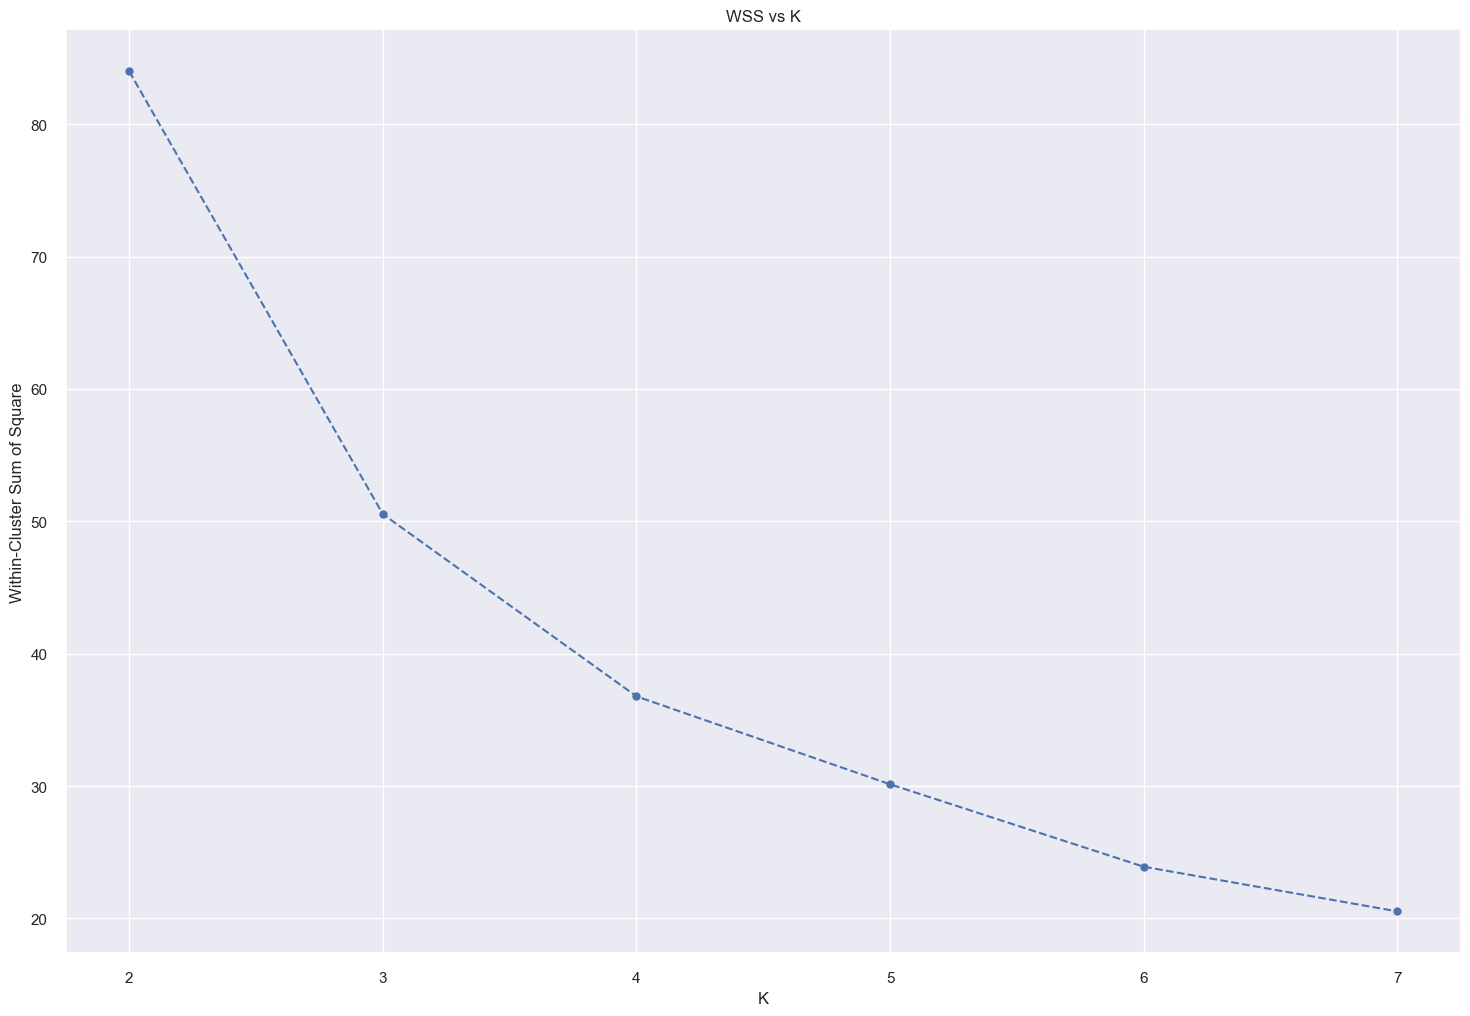

In [40]:
# método raíz
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans.fit( X )
    
    # validation
    wss.append( kmeans.inertia_ )

# plot wss - Elbow Method
plt.plot( clusters, wss, linestyle='--', marker='o', color='b' )
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('WSS vs K')

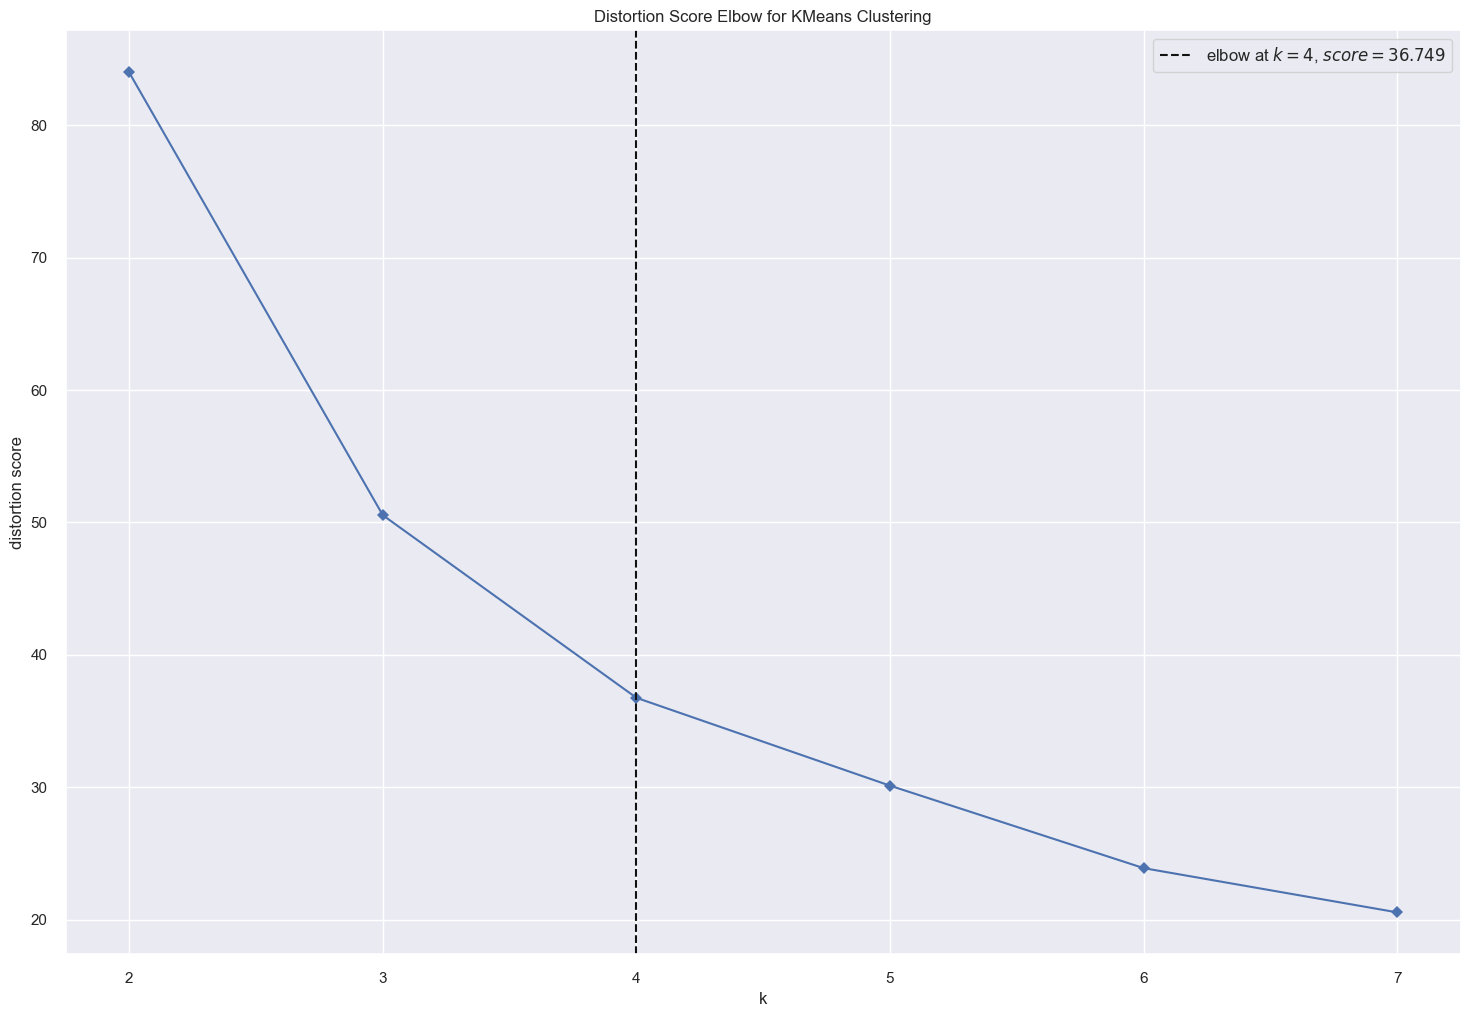

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()

In [42]:
wss

[83.9998788144346,
 50.54908528272409,
 36.78053919328391,
 30.13520499078435,
 23.909282408803417,
 20.534432415685465]

## 8.2 Silhouette Score

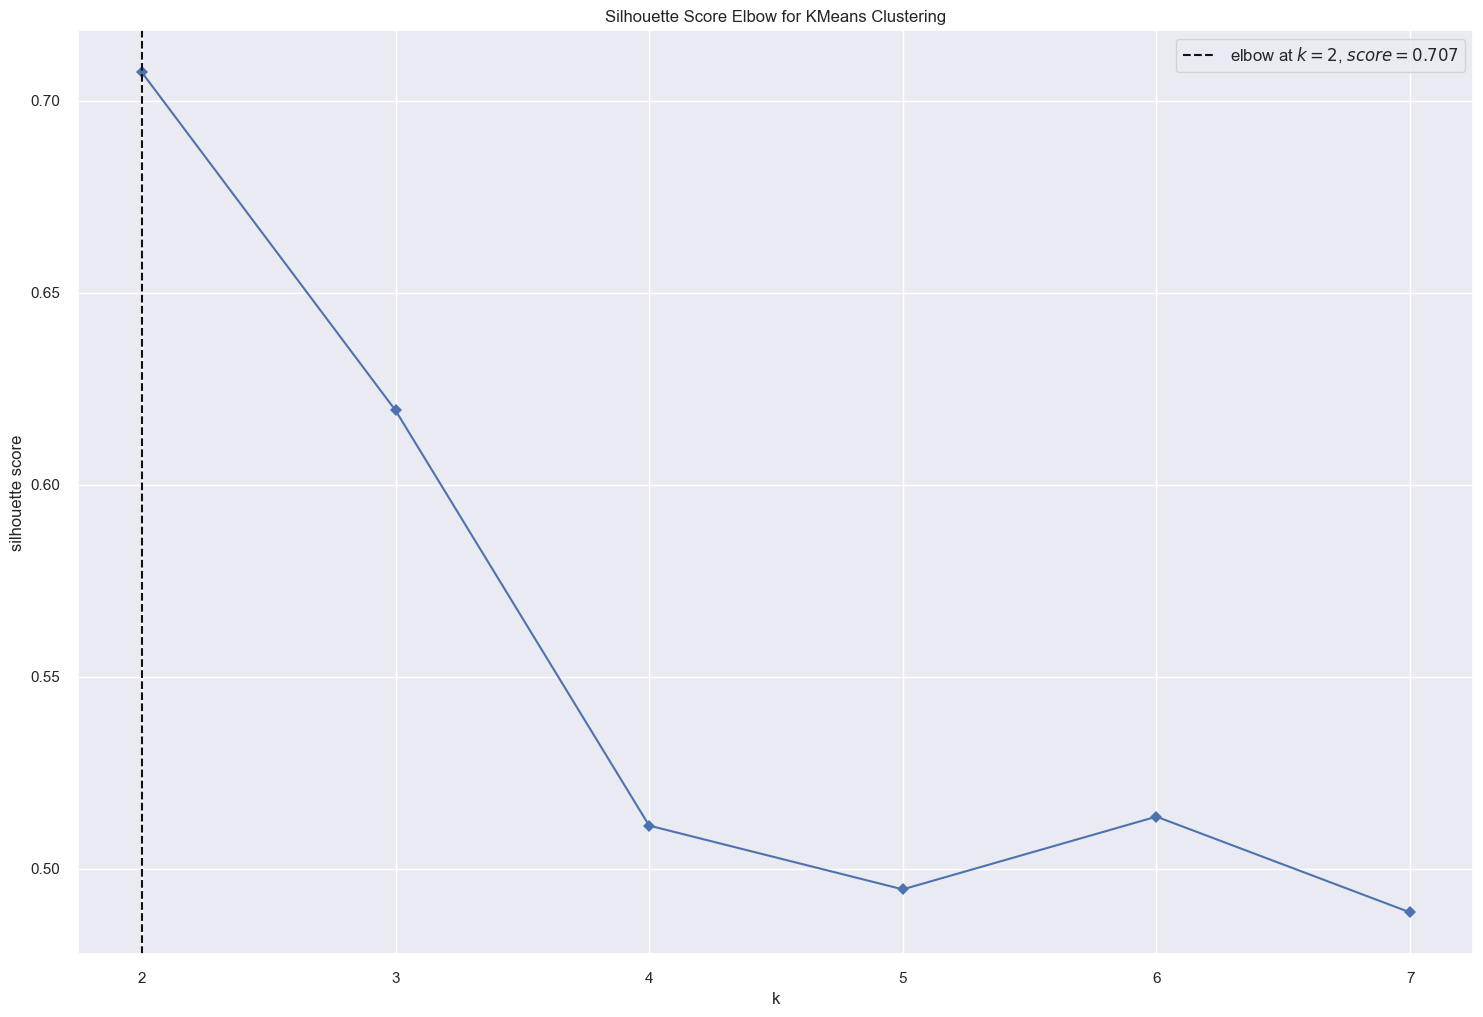

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [43]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

## 8.3 Silhouette Analysis

In [44]:
# fig, ax = plt.subplots( 3, 2, figsize=(12, 6) )
# for x in clusters:
#     km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42 )
#     q, mod = divmod( k, 2 )
    
#     visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod] )
#     visualizer.fit(X)
#     visualizer.finalize()

#### K = 2

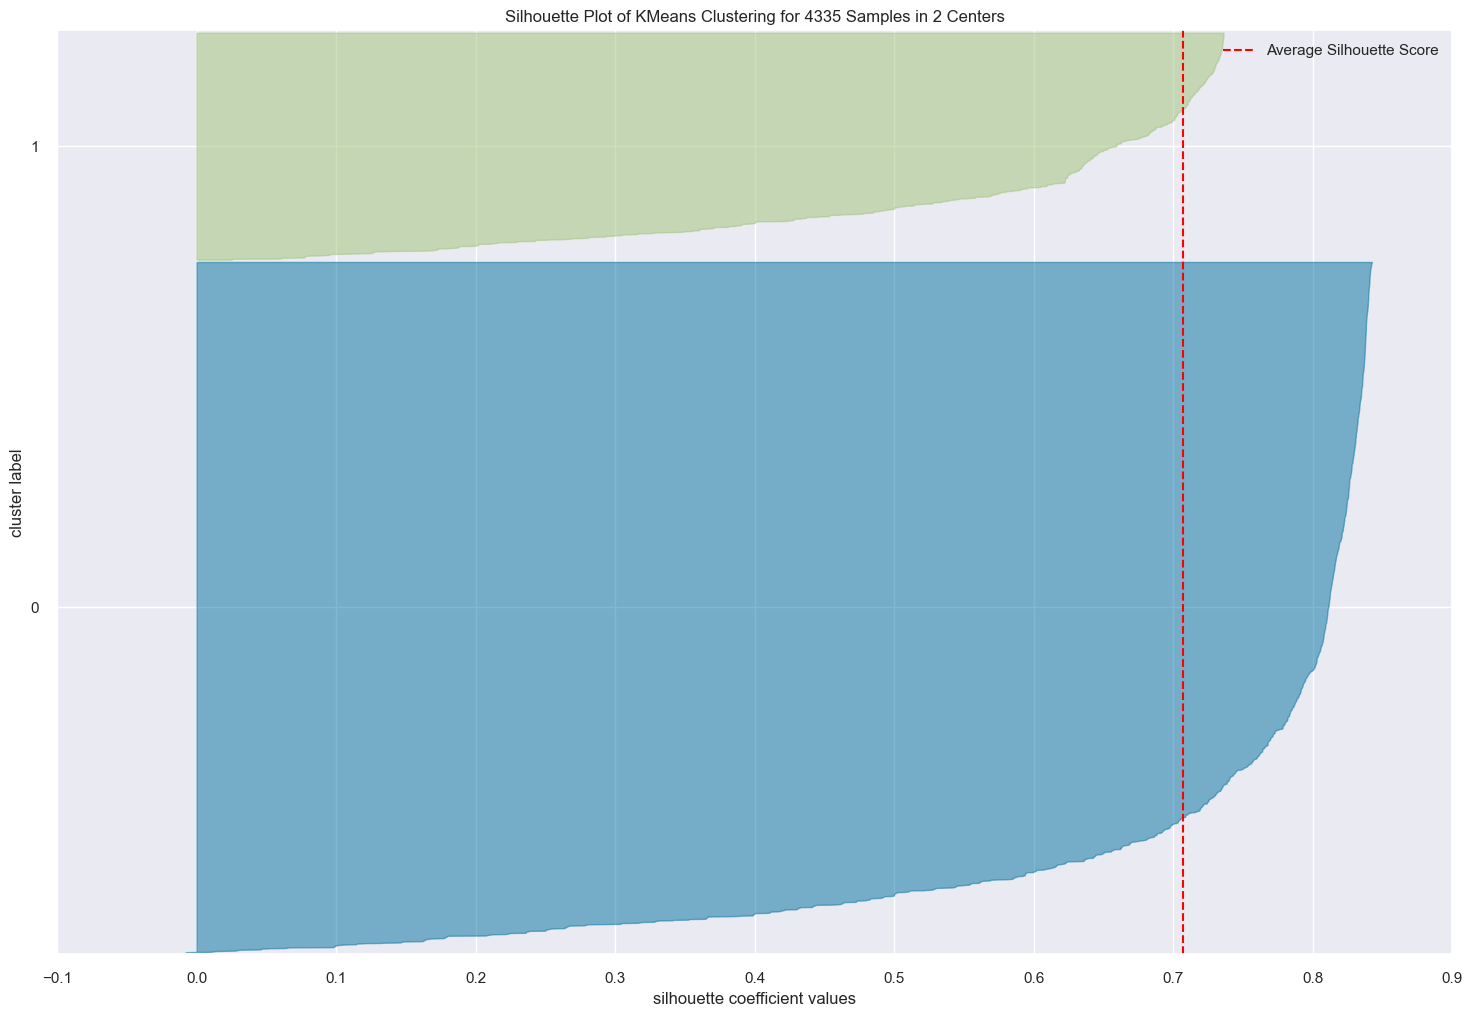

In [45]:
km = c.KMeans( n_clusters=2, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 3

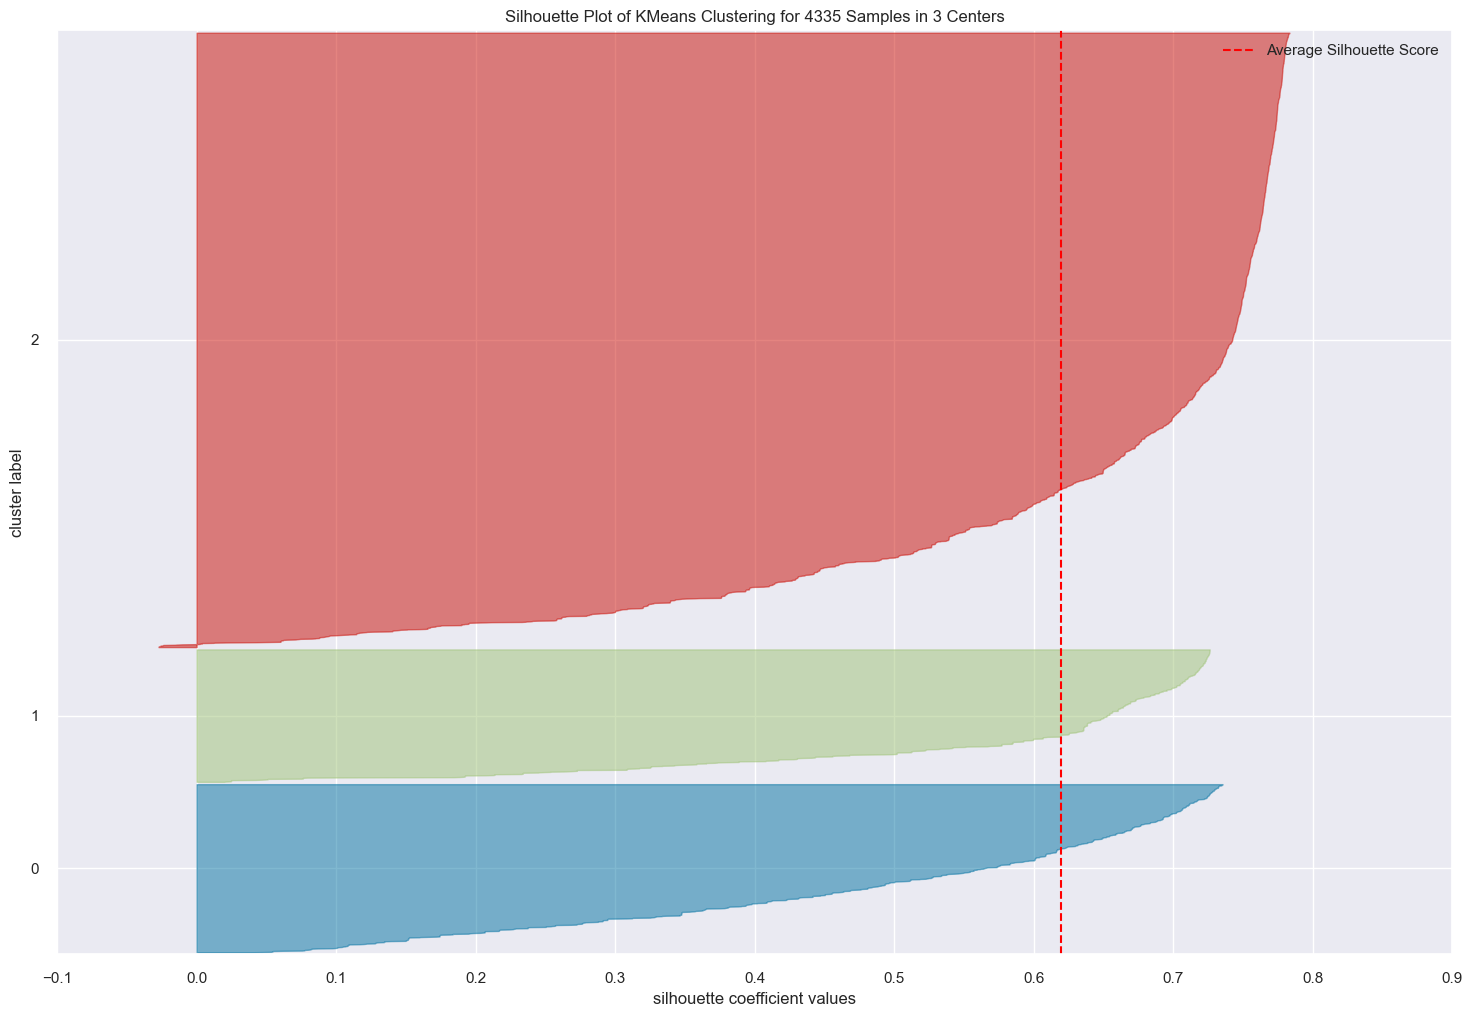

In [46]:
km = c.KMeans( n_clusters=3, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 4

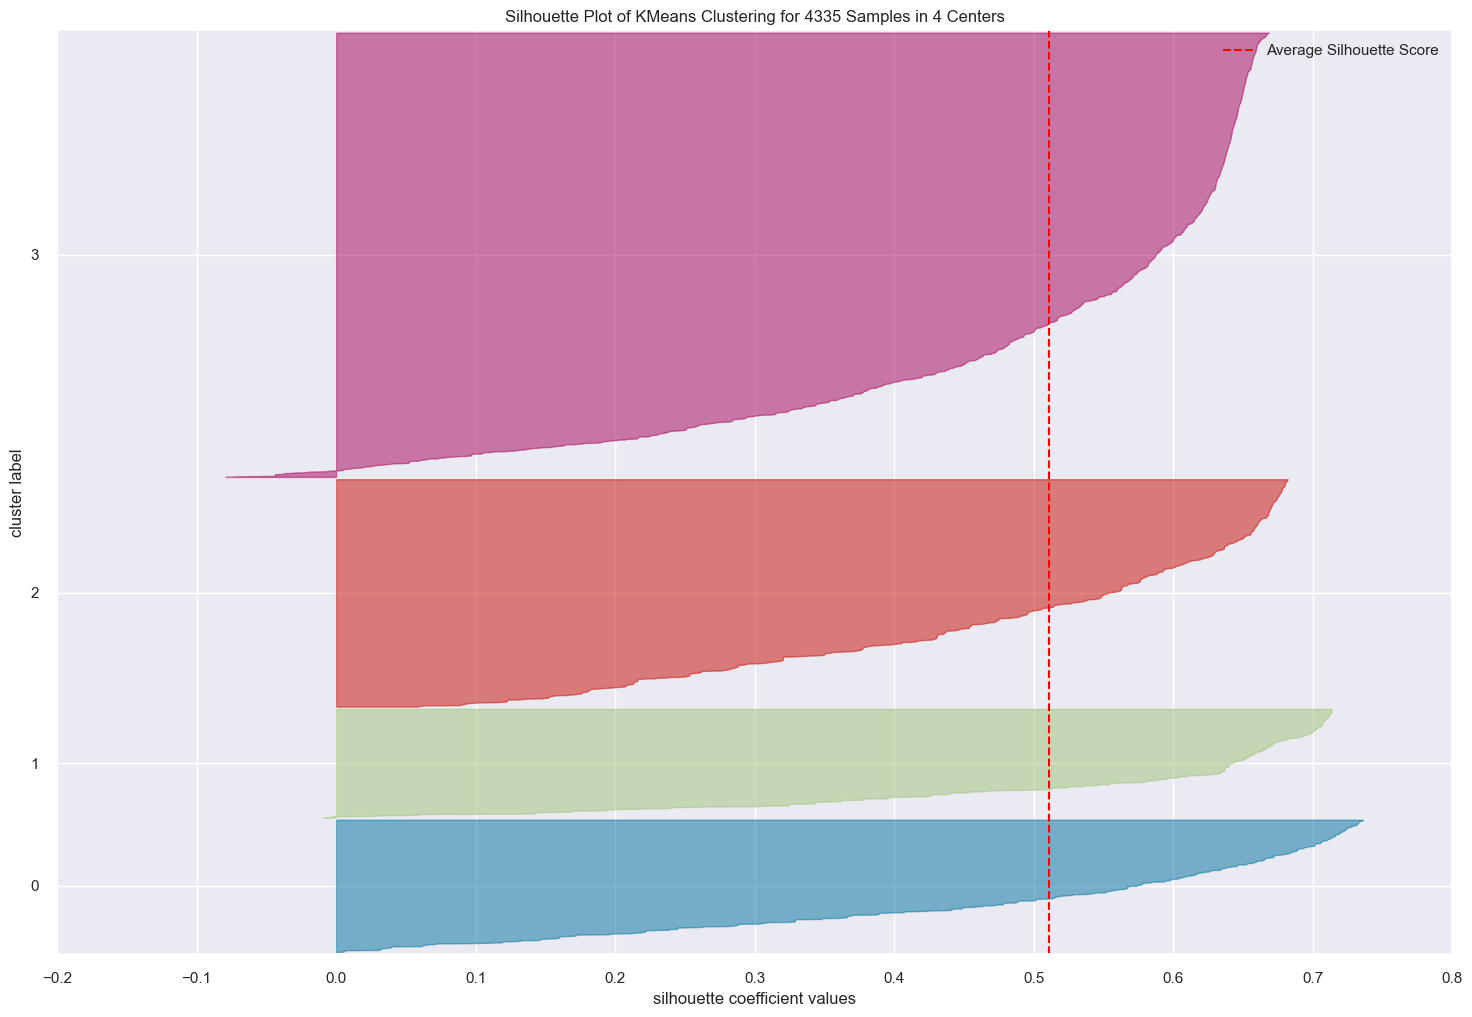

In [47]:
km = c.KMeans( n_clusters=4, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 5

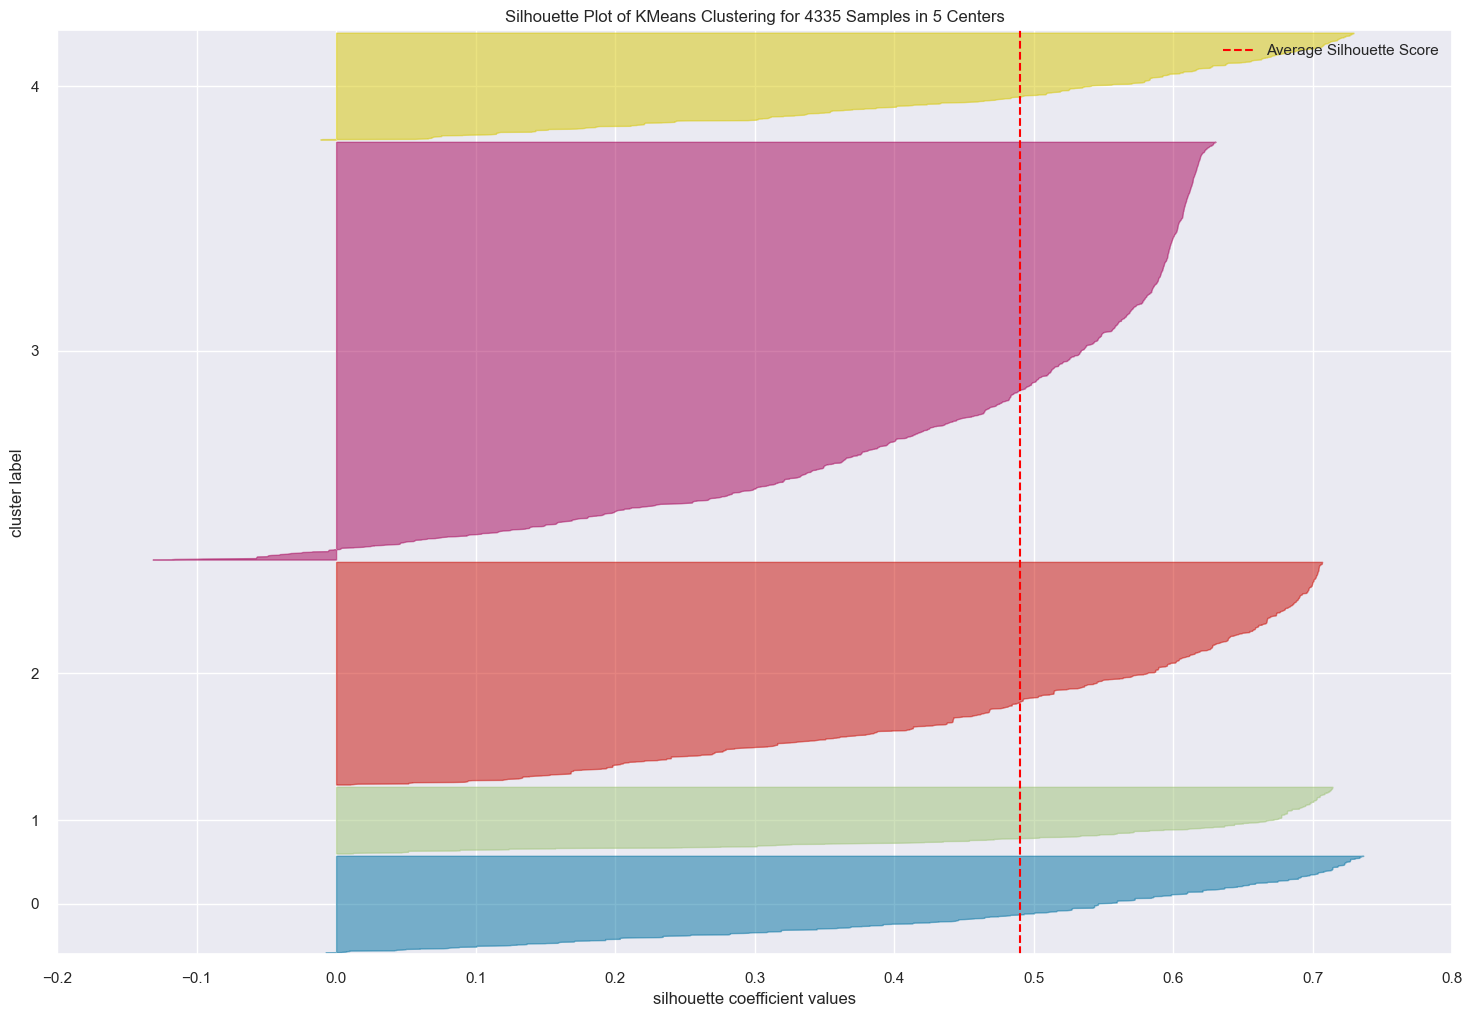

In [48]:
km = c.KMeans( n_clusters=5, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 6

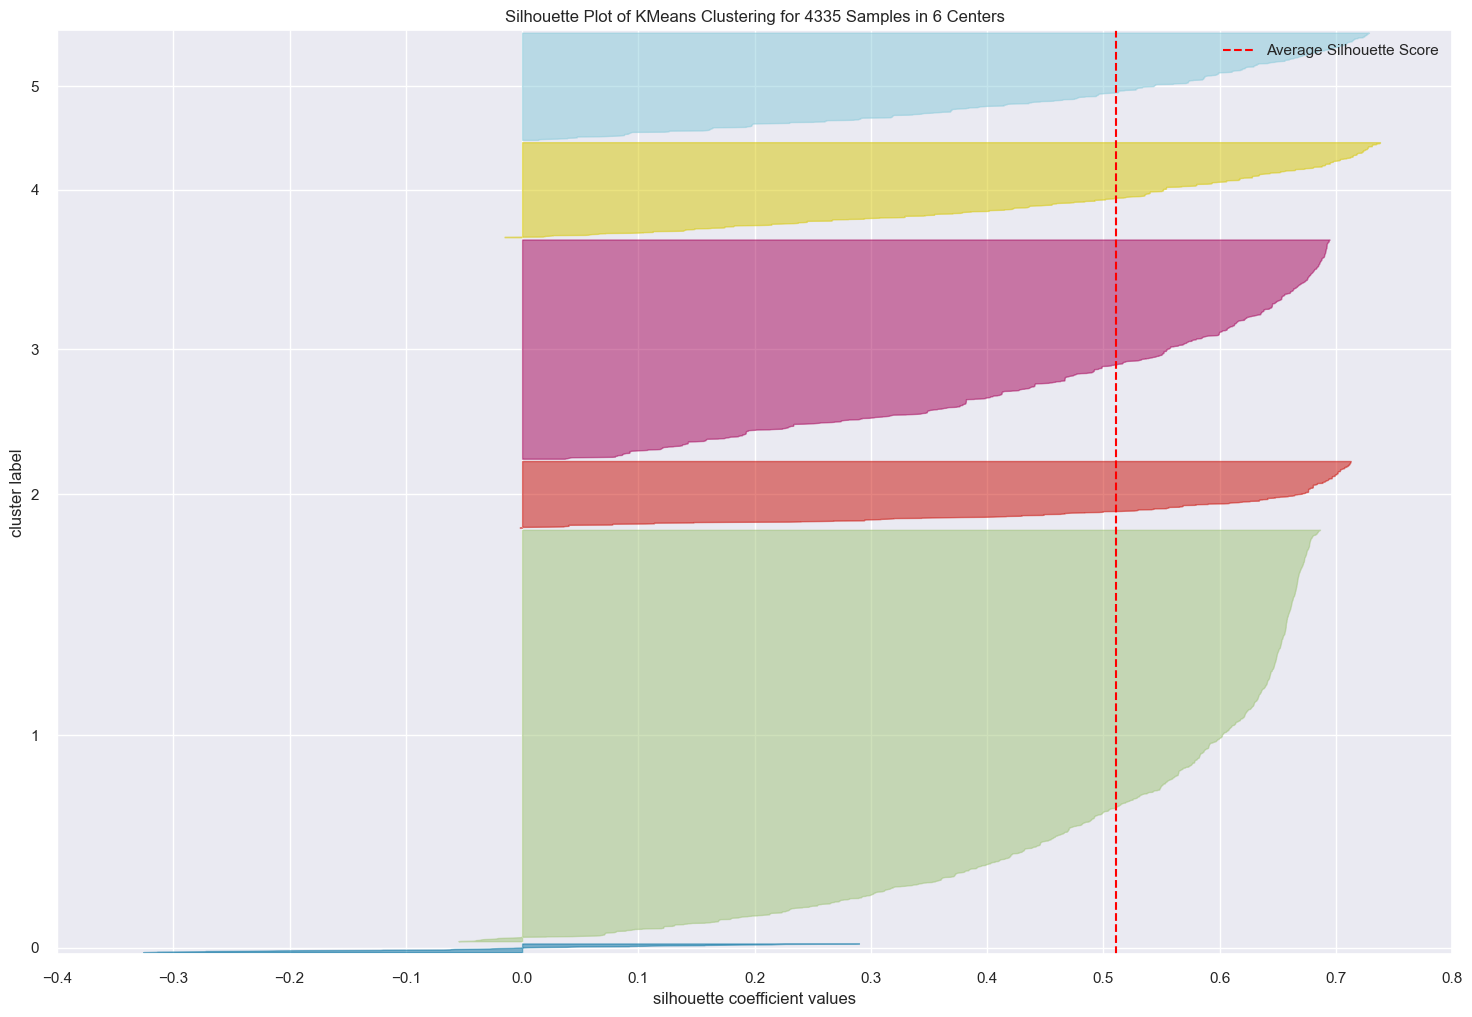

In [49]:
km = c.KMeans( n_clusters=6, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 7

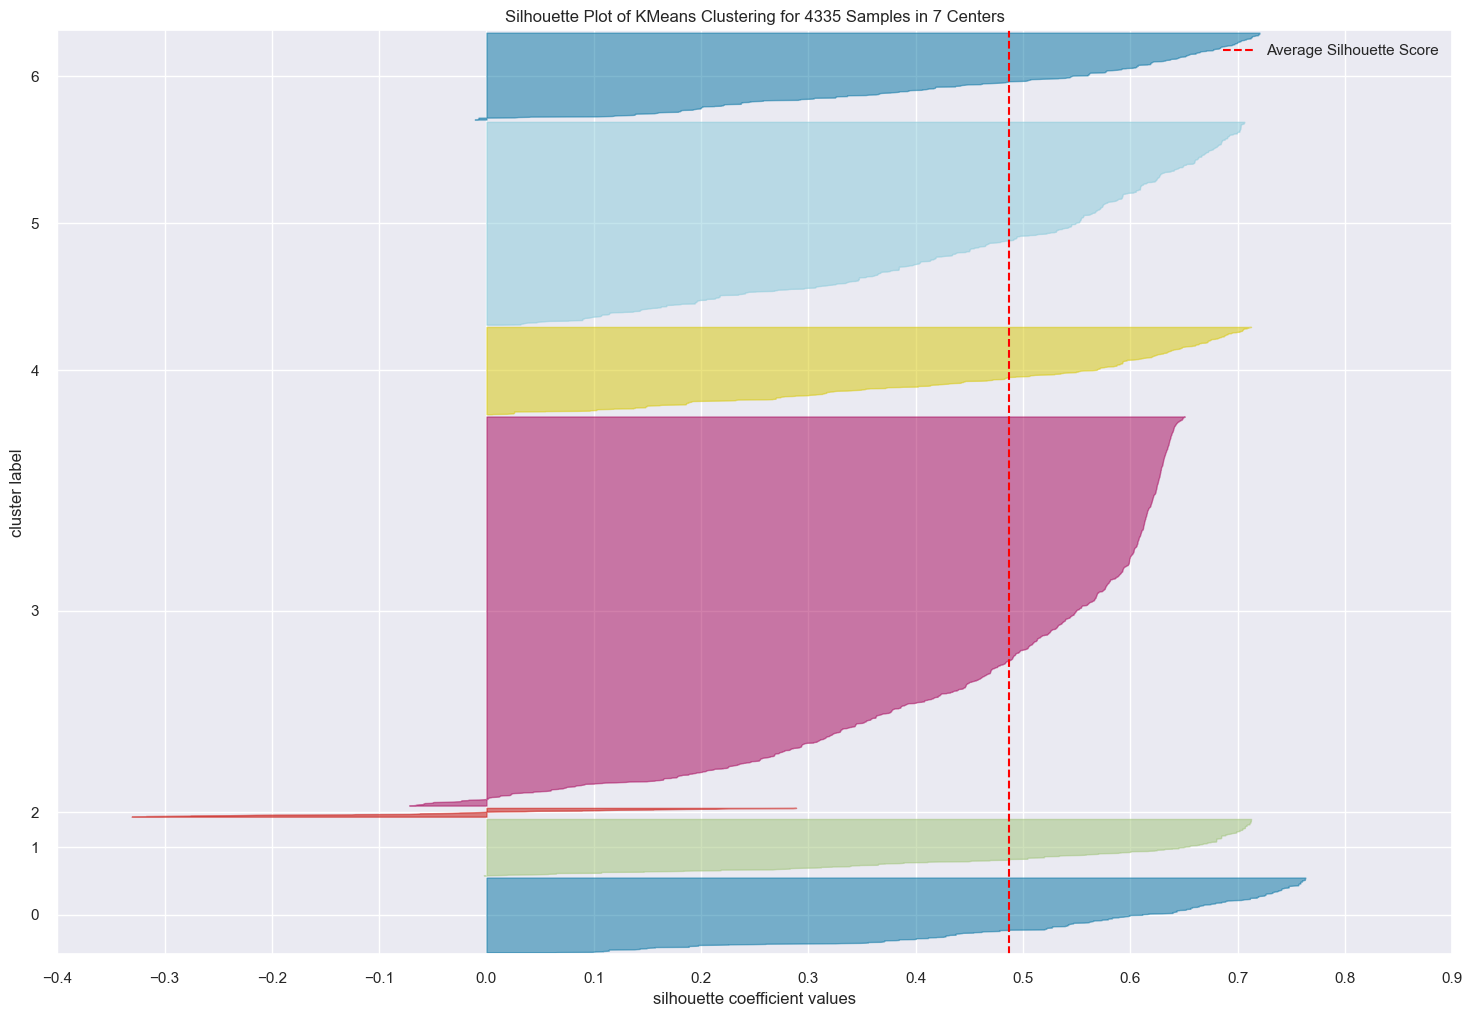

In [50]:
km = c.KMeans( n_clusters=7, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

# 9.0 MODEL TRAINING

## 9.1 KMeans

In [51]:
# model definition
k = 6
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 9.2 Cluster Validation

In [52]:
from sklearn import metrics as m

In [53]:
# WSS
print('WSS value: {}'.format( kmeans.inertia_ ))

# SS
print('SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

WSS value: 23.909282408803417
SS value: 0.5111320210067252


# 10.0 CLUSTER ANALYSIS

In [54]:
df10 = df7.copy()
df10['cluster'] = labels
df10.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,returns,cluster
0,17850,0.019301,0.997319,0.160976,0.000208,0.022222,2
1,13047,0.011567,0.150134,0.039024,0.000218,0.155556,3
2,12583,0.024009,0.005362,0.068293,0.000347,0.044444,1
3,13748,0.003384,0.254692,0.019512,0.000412,0.000000,3
4,15100,0.003125,0.892761,0.009756,0.003756,0.066667,2


## 10.1 Visualization Inspection

c:\Users\jocaf\anaconda3\envs\cluster\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


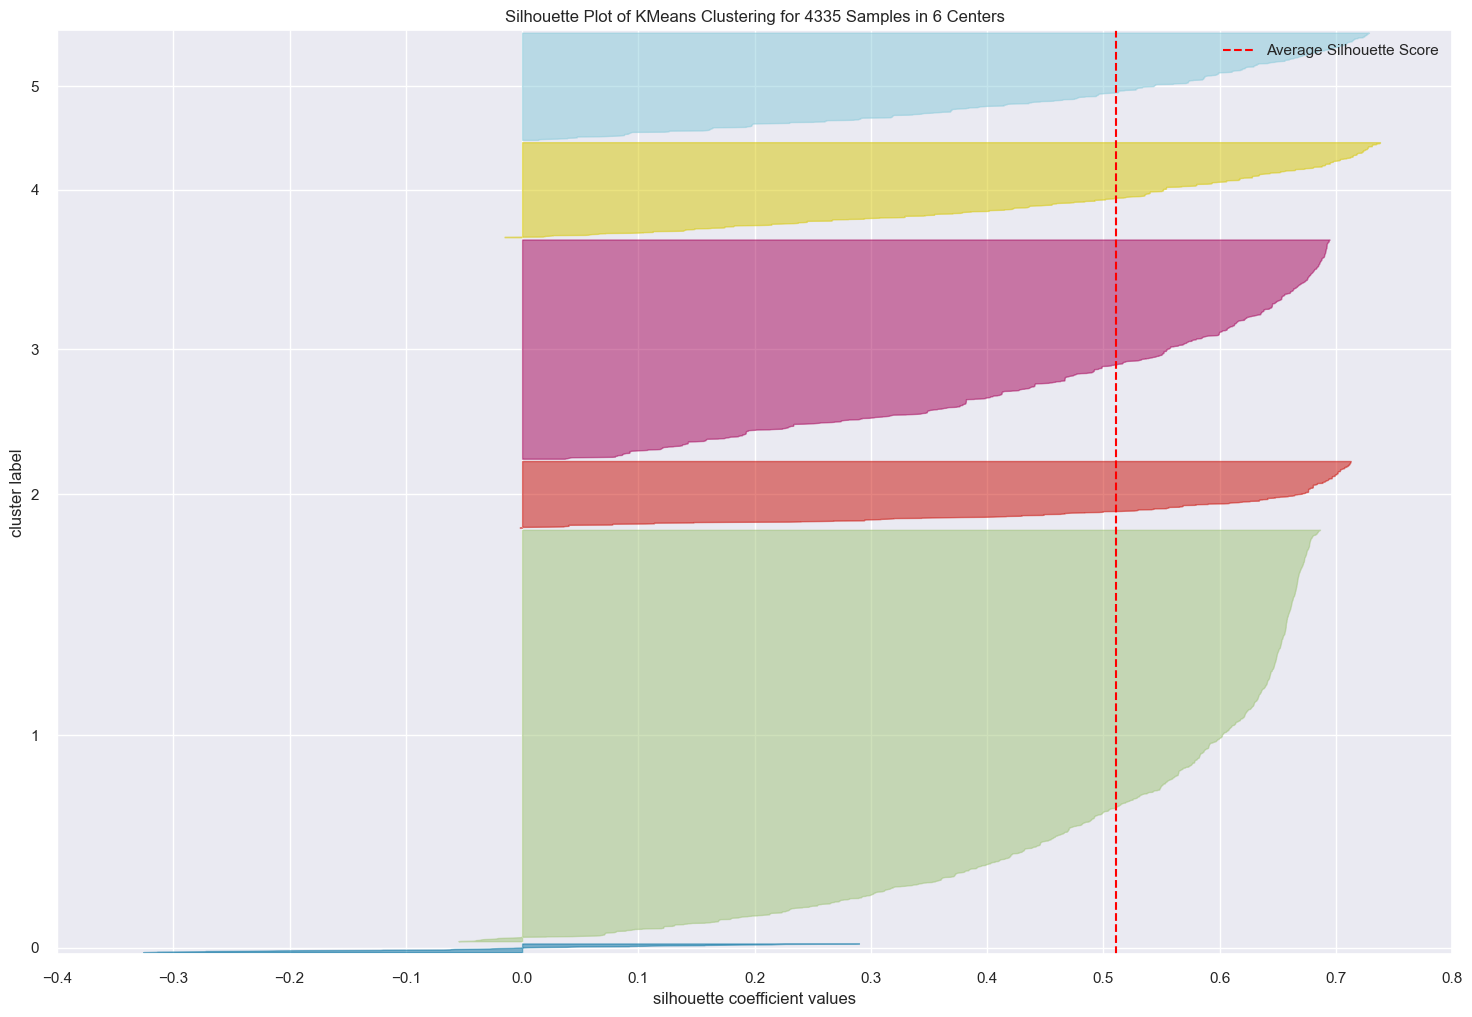

In [55]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

## 10.2 2d_plot

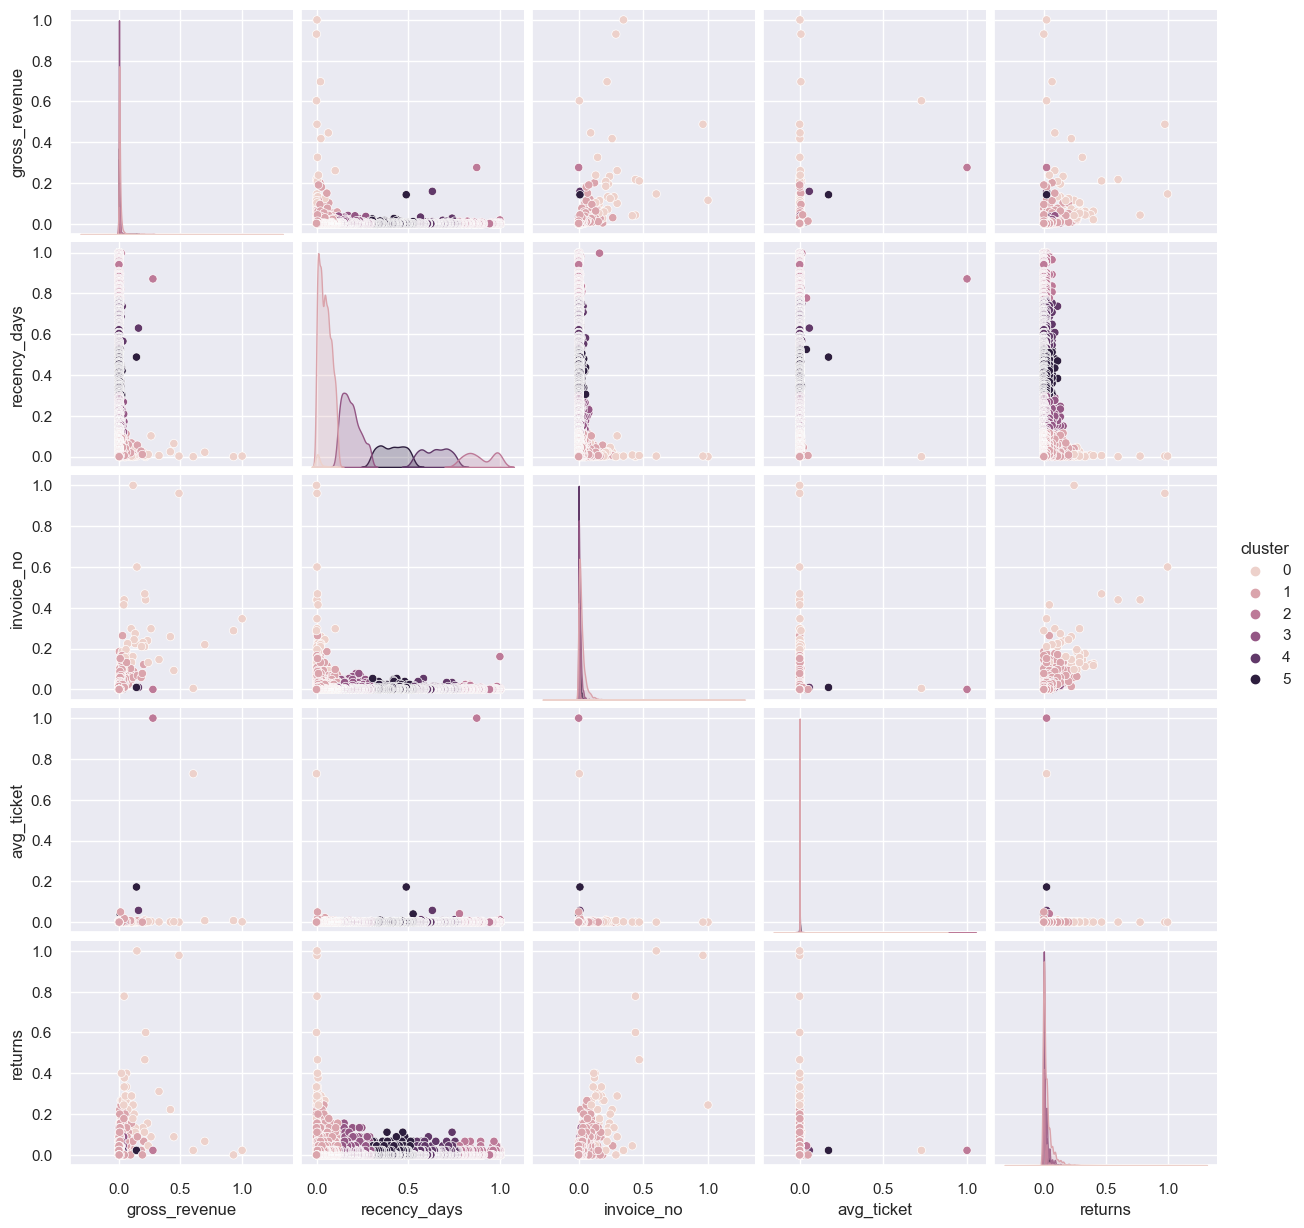

In [56]:
df_viz = df10.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster')

## 10.3 UMAP - t-SNE

Machine Learning - Manifold

PCA - Matrix, Espaço de Distância - Espaço de Hilbert - 9 colorários

UMAP - t-SNE (2009) - Topologia

UMAP - Mais rapido para grande volume de dados, tem dificuldade pra visualização
t-SNE - Mas lento mas tem uma precisão melhor de visualização


<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

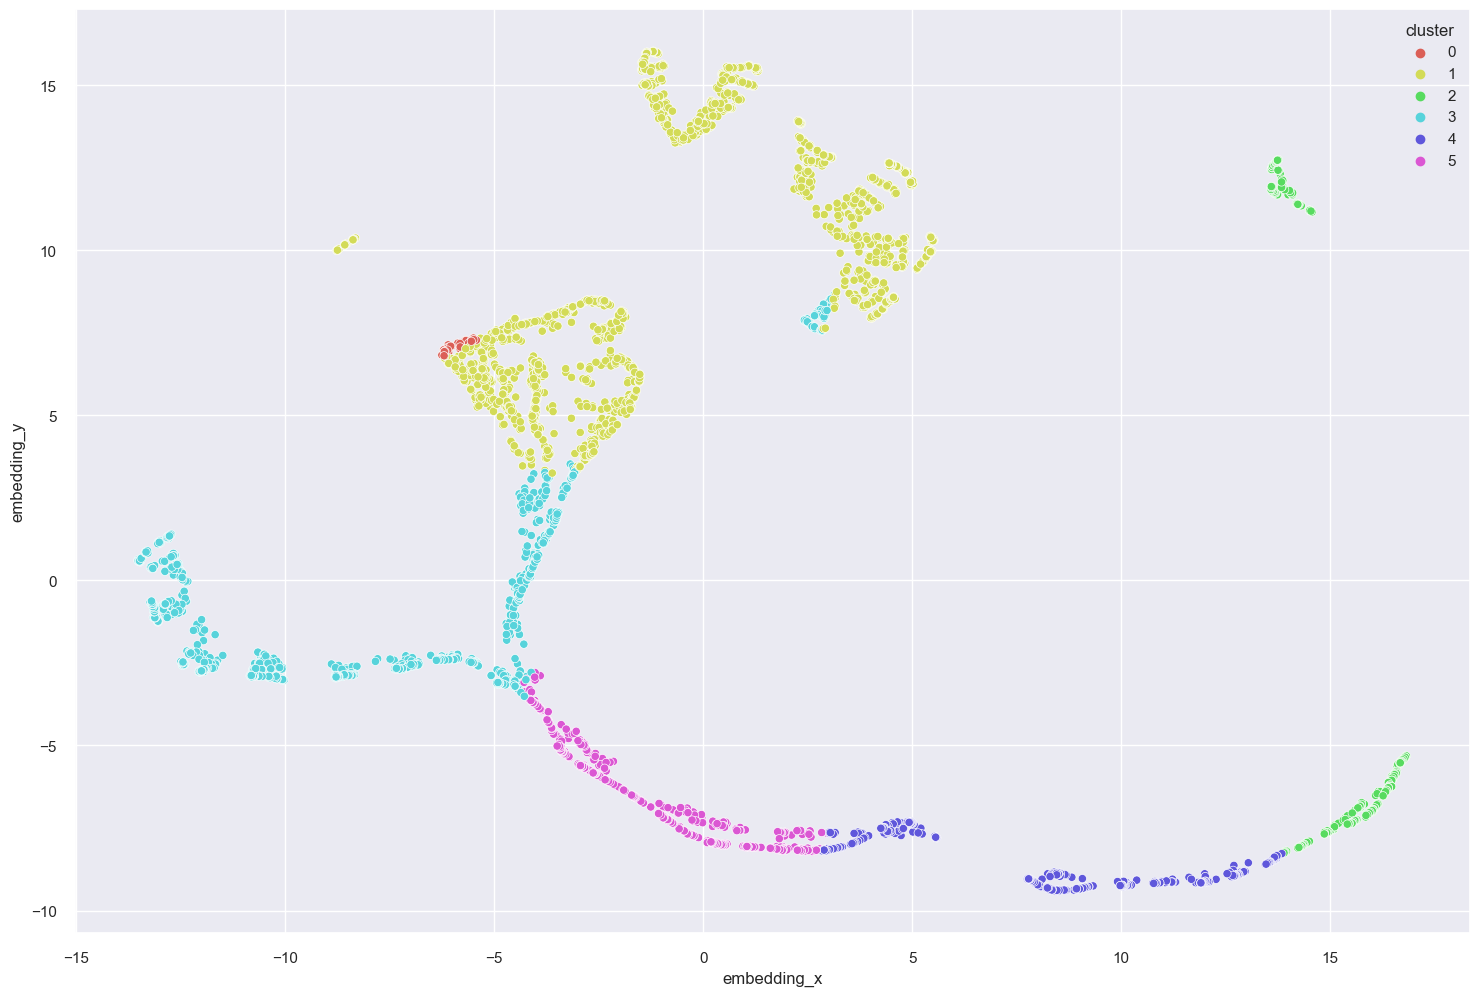

In [57]:
reducer = umap.UMAP( n_neighbors=60, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( data=df_viz, x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ) )

## 10.2 Cluster Profile

In [58]:
# Number of Costumer
df_cluster = df10[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100 * (df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# AVG Gross Revenue
df_avg_gross = df10[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross, how='inner', on='cluster')

# AVG Recency Days
df_avg_recency = df10[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency, how='inner', on='cluster')

# AVG Invoice Number
df_invoice_no = df10[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_invoice_no, how='inner', on='cluster')

# AVG Ticket 
df_ticket = df10[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster')

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,43,0.991926,0.199137,0.012220,0.250255,0.018358
1,1,1962,45.259516,0.008055,0.046504,0.022826,0.000356
2,2,318,7.335640,0.002264,0.890249,0.001641,0.003715
3,3,1046,24.129181,0.003699,0.186442,0.008236,0.000350
4,4,454,10.472895,0.002085,0.645144,0.002407,0.000572
5,5,512,11.810842,0.002788,0.408486,0.005659,0.000789


# 11.0 DEPLOY TO PRODUCTION